In [244]:
import numpy as np
import pandas as pd
import string
import re  #regular expression
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import *
import nltk

# Read Data

In [245]:
data = pd.read_csv(r"C:\Users\amitk\Machine Learning\Twitter Sentiment Analysis Project\train_text_new.csv")
data.head()

,Text
0,@JayyTheSage_ Because not only am I becoming m...
1,#FHN 'Why is ending racism a debate?'\nDarcy B...
2,Supreme.G - Black Lives Matter https://t.co/tS...
3,all lives canâ€™t matter till black lives matter
4,@cyditty__ So first he all for black lives mat...


# Cleaning Data

In [246]:
#Removing Emojis

#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [247]:
stemmer = nltk.stem.PorterStemmer()

In [248]:
tkns = []

def clean_tweets(tweet):
 
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)           #Removed Mentions     
    tweet = re.sub(r'#','',tweet)                       #Removing the '#' symbol
    tweet = re.sub(r'RT[\s]+','',tweet)                 #Removing Re-tweets
    tweet = re.sub(r'https?:\/\/\S+','',tweet)          #Remove the hyperlink
    tweet = re.sub(r':', '', tweet)                     
    tweet = re.sub(r'‚Ä¶', '', tweet)     
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)         #replace consecutive non-ASCII characters with a space
    tweet = emoji_pattern.sub(r'', tweet)               #remove emojis from tweet
    
    rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE)       
    tweet = rpt_regex.sub(r"\1\1", tweet)               # Repeating words like happyyyyyyyy                                       
    
    
    tweet_stem = ''
    words = [word if(word[0:2]=='__') else word.lower() \
                for word in tweet.split() \
                if len(word) >= 3]
    words = [stemmer.stem(w) for w in words] 
    tweet_stem = ' '.join(words)
    tweet = tweet_stem
    
    sw = set(stopwords.words('english'))                
    sw.remove('not')
    sw.remove('nor')

    tokenizer = RegexpTokenizer('[a-zA-Z]+')
    word_tokens = tokenizer.tokenize(tweet.lower())
     
    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in sw]
    filtered_tweet = []
    
    #looping through conditions
    for w in word_tokens:
        
        #check tokens against stop words , emoticons and punctuations
        if w not in sw and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    
    tkns.append(filtered_tweet)
    
    return ' '.join(filtered_tweet)

In [249]:
#Cleaned Tweets

filtered_tweets = []

for i in range(len(data)):
    filtered_tweets.append(clean_tweets(data["Text"][i]))
    
print(filtered_tweets)                  

['becaus not onli becom educ v also learn peopl belief', 'fhn whi end racism debate darci bourn year old athlet great britain elit developmen', 'supreme g black live matter', 'live matter till black live matter', 'first black live matter quick say black guy jump ugli shit', 'black live matter killer black', 'say black live matter think live matter', 'thi took life like black live matter campaign white peopl', 'black live matter movement via', 'supreme g black live matter', 'good morning may news share today see meantime rememb black live matter', 'ant middleton address delet tweet refer black live matter protest scum', 'democrat clarifi black live onli matter novemb via', 'global pride focu black live matter first worldwid lgbt event via', 'first sign racism ani idiot know live matter onli racist refus say black', 'need attent minutes applic trademark phrase', 'blue live would matter care black lives', 'wow thi video realli import everi person need watch share black liv', 'liter anyon 

In [250]:
print(tkns)

[['becaus', 'not', 'onli', 'becom', 'educ', 'v', 'also', 'learn', 'peopl', 'belief'], ['fhn', 'whi', 'end', 'racism', 'debate', 'darci', 'bourn', 'year', 'old', 'athlet', 'great', 'britain', 'elit', 'developmen'], ['supreme', 'g', 'black', 'live', 'matter'], ['live', 'matter', 'till', 'black', 'live', 'matter'], ['first', 'black', 'live', 'matter', 'quick', 'say', 'black', 'guy', 'jump', 'ugli', 'shit'], ['black', 'live', 'matter', 'killer', 'black'], ['say', 'black', 'live', 'matter', 'think', 'live', 'matter'], ['thi', 'took', 'life', 'like', 'black', 'live', 'matter', 'campaign', 'white', 'peopl'], ['black', 'live', 'matter', 'movement', 'via'], ['supreme', 'g', 'black', 'live', 'matter'], ['good', 'morning', 'may', 'news', 'share', 'today', 'see', 'meantime', 'rememb', 'black', 'live', 'matter'], ['ant', 'middleton', 'address', 'delet', 'tweet', 'refer', 'black', 'live', 'matter', 'protest', 'scum'], ['democrat', 'clarifi', 'black', 'live', 'onli', 'matter', 'novemb', 'via'], ['glo

In [251]:
filtered_tweets = np.array(filtered_tweets)
print(filtered_tweets.shape)

(7061,)


In [252]:
tokens = np.array(tkns)
print(tokens.shape)
print(type(tokens))

(7061,)
<class 'numpy.ndarray'>


In [253]:
df = np.column_stack((filtered_tweets, tokens))

# Filtered Data

In [254]:
df = pd.DataFrame(data=df,columns=['Text','Tokens'])
df.head()

,Text,Tokens
0,becaus not onli becom educ v also learn peopl ...,"[becaus, not, onli, becom, educ, v, also, lear..."
1,fhn whi end racism debate darci bourn year old...,"[fhn, whi, end, racism, debate, darci, bourn, ..."
2,supreme g black live matter,"[supreme, g, black, live, matter]"
3,live matter till black live matter,"[live, matter, till, black, live, matter]"
4,first black live matter quick say black guy ju...,"[first, black, live, matter, quick, say, black..."


# Preparing Training Dataset

In [255]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Text'].apply(getPolarity)

df.head()

,Text,Tokens,Polarity
0,becaus not onli becom educ v also learn peopl ...,"[becaus, not, onli, becom, educ, v, also, lear...",0.000000
1,fhn whi end racism debate darci bourn year old...,"[fhn, whi, end, racism, debate, darci, bourn, ...",0.450000
2,supreme g black live matter,"[supreme, g, black, live, matter]",-0.015152
3,live matter till black live matter,"[live, matter, till, black, live, matter]",0.035354
4,first black live matter quick say black guy ju...,"[first, black, live, matter, quick, say, black...",0.031061


In [256]:
df.Polarity.unique()

array([ 0.00000000e+00,  4.50000000e-01, -1.51515152e-02,  3.53535354e-02,
        3.10606061e-02, -6.56565657e-02, -1.01010101e-02,  2.23232323e-01,
       -1.10101010e-01,  5.49242424e-02, -1.45075758e-01, -3.33333333e-02,
        1.26262626e-02, -7.67676768e-02, -2.00000000e-01,  2.85714286e-01,
       -3.19865320e-02,  7.99242424e-02,  3.23232323e-01,  2.32323232e-02,
       -3.00000000e-01, -1.66666667e-01,  8.51370851e-02,  1.36363636e-01,
       -1.14267677e-01,  5.00000000e-02, -3.01767677e-01, -9.92424242e-02,
        2.65151515e-02, -3.12500000e-01,  1.28787879e-01,  8.88528139e-02,
        1.39393939e-02,  2.00000000e-01,  6.00000000e-01, -2.76767677e-01,
        1.06565657e-01,  5.39393939e-02,  4.00000000e-01,  1.95075758e-02,
        1.23232323e-01,  1.07323232e-02, -6.60606061e-02, -1.49242424e-01,
        1.56565657e-01,  1.00000000e-01,  7.00000000e-01, -1.43434343e-01,
        3.67424242e-01,  8.00000000e-01,  1.26515152e-01, -9.02777778e-02,
        1.89898990e-01, -

In [257]:
polarity = []
countp = 0
countn = 0
count = 0

pos = []
neg = []

for i in df.Polarity:
    if i < 0:
        pos.append(0)
        neg.append(1)
        polarity.append(0)
        countn += 1
    elif i >= 0:
        polarity.append(1)
        pos.append(1)
        neg.append(0)
        countp += 1
    
print(countp,countn)

2722 4339


In [258]:
df['Polarity']= polarity
df["Pos"] = pos
df["Neg"] = neg

In [259]:
df.head(10)

,Text,Tokens,Polarity,Pos,Neg
0,becaus not onli becom educ v also learn peopl ...,"[becaus, not, onli, becom, educ, v, also, lear...",1,1,0
1,fhn whi end racism debate darci bourn year old...,"[fhn, whi, end, racism, debate, darci, bourn, ...",1,1,0
2,supreme g black live matter,"[supreme, g, black, live, matter]",0,0,1
3,live matter till black live matter,"[live, matter, till, black, live, matter]",1,1,0
4,first black live matter quick say black guy ju...,"[first, black, live, matter, quick, say, black...",1,1,0
5,black live matter killer black,"[black, live, matter, killer, black]",0,0,1
6,say black live matter think live matter,"[say, black, live, matter, think, live, matter]",1,1,0
7,thi took life like black live matter campaign ...,"[thi, took, life, like, black, live, matter, c...",0,0,1
8,black live matter movement via,"[black, live, matter, movement, via]",0,0,1
9,supreme g black live matter,"[supreme, g, black, live, matter]",0,0,1


In [260]:
df.to_csv('new_train.csv', index=False)

# Word cloud of Negative and Positive Tweets

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer



plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [79]:
#Creating Negative tweets list

neg_tweets = df[df.Polarity == 0]
neg_string = []
for t in neg_tweets.Text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

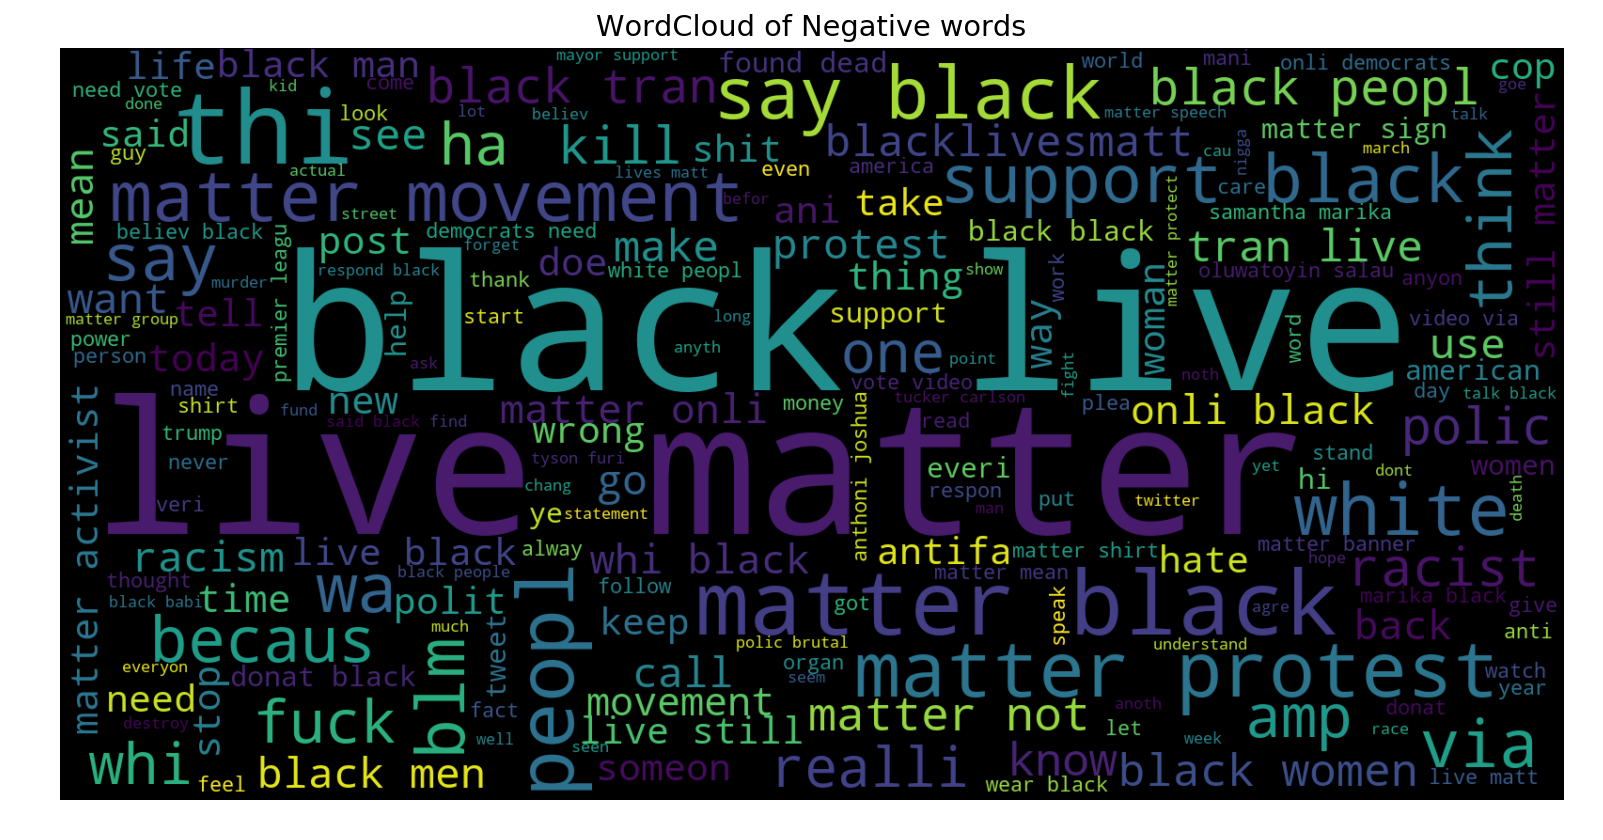

In [80]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Negative words")
plt.show()

In [81]:
#Creating Positive tweets list

pos_tweets = df[df.Polarity == 1]
pos_string = []
for t in pos_tweets.Text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

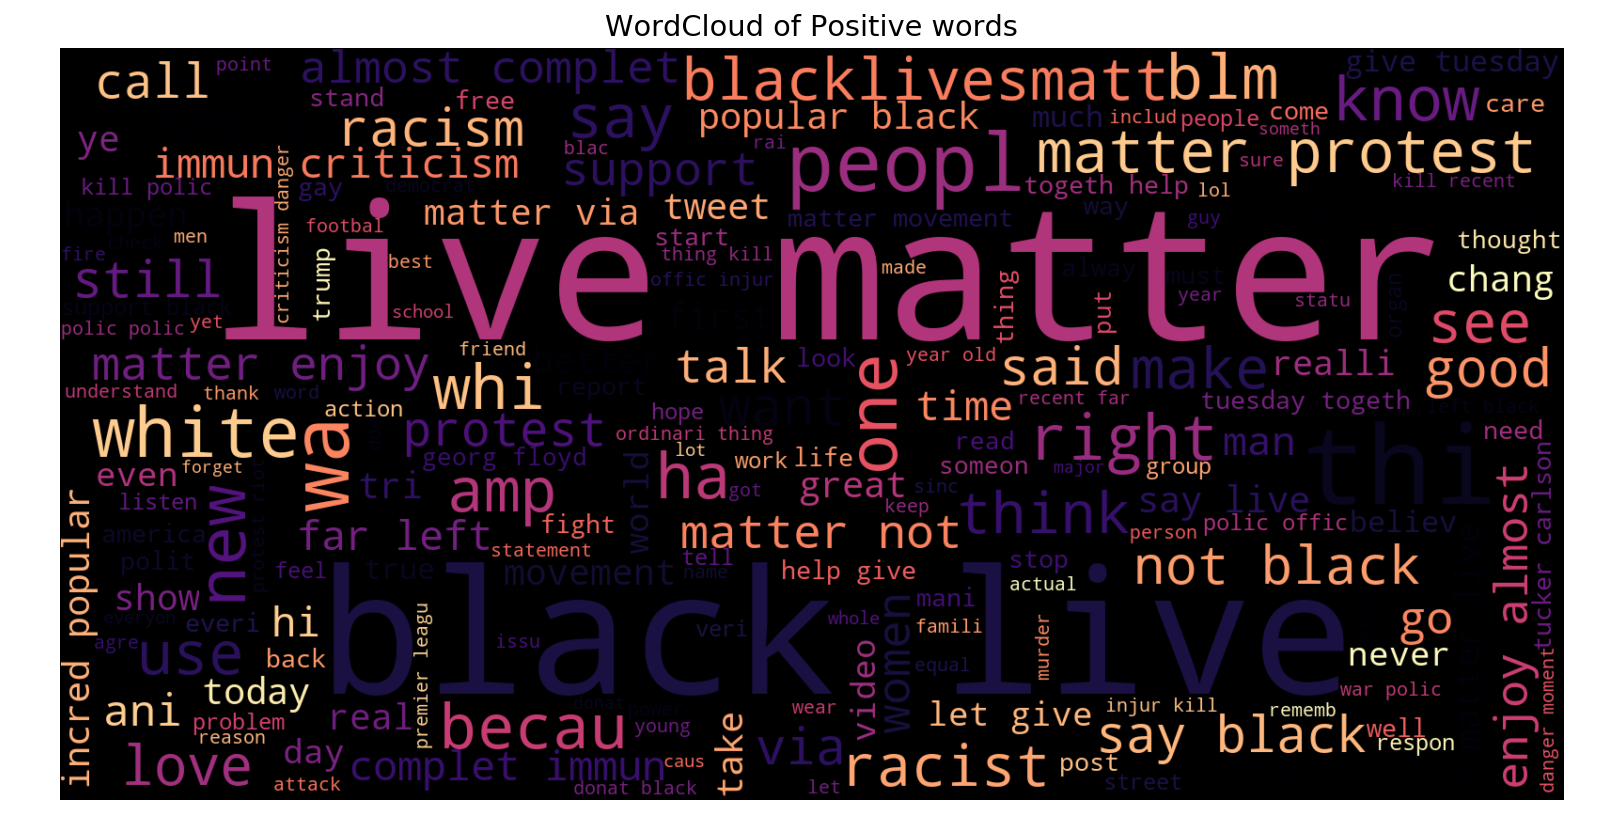

In [82]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Positive words")
plt.show()

# Preparation for data visualisation

In [83]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [84]:
document_matrix = cvec.transform(neg_tweets.Text)

In [85]:
neg_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 2 to 7060
Data columns (total 5 columns):
Text        4339 non-null object
Tokens      4339 non-null object
Polarity    4339 non-null int64
Pos         4339 non-null int64
Neg         4339 non-null int64
dtypes: int64(3), object(2)
memory usage: 203.4+ KB


In [86]:
neg_batches = np.linspace(0,10600,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    i += 1

In [87]:
document_matrix = cvec.transform(pos_tweets.Text)

In [88]:
pos_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 0 to 7059
Data columns (total 5 columns):
Text        2722 non-null object
Tokens      2722 non-null object
Polarity    2722 non-null int64
Pos         2722 non-null int64
Neg         2722 non-null int64
dtypes: int64(3), object(2)
memory usage: 127.6+ KB


In [89]:
pos_batches = np.linspace(0,5402,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    i += 1

In [90]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
black,4666,1385,6051
live,3898,1660,5558
matter,3828,1512,5340
thi,408,317,725
peopl,347,194,541
protest,356,184,540
say,323,201,524
white,252,135,387
polic,172,169,341
wa,178,160,338


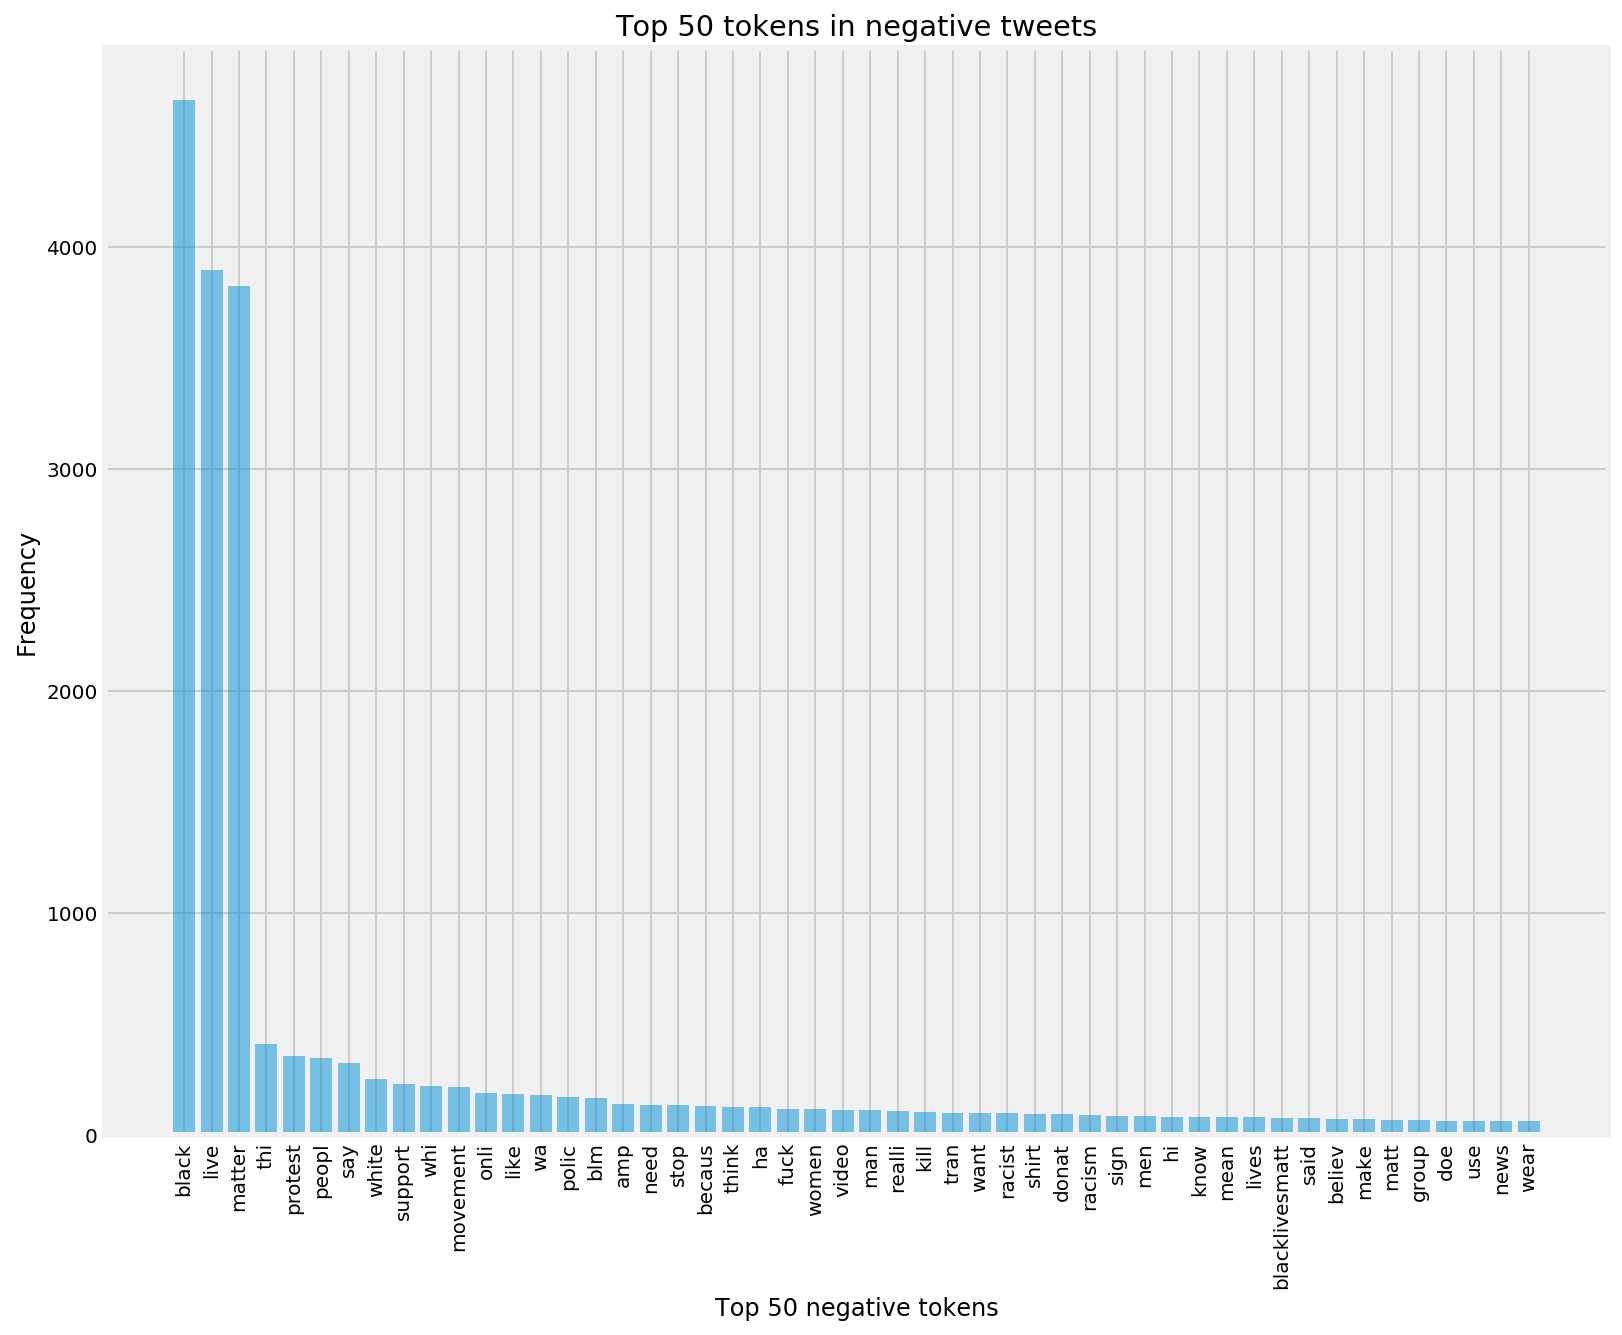

In [91]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')
plt.show()

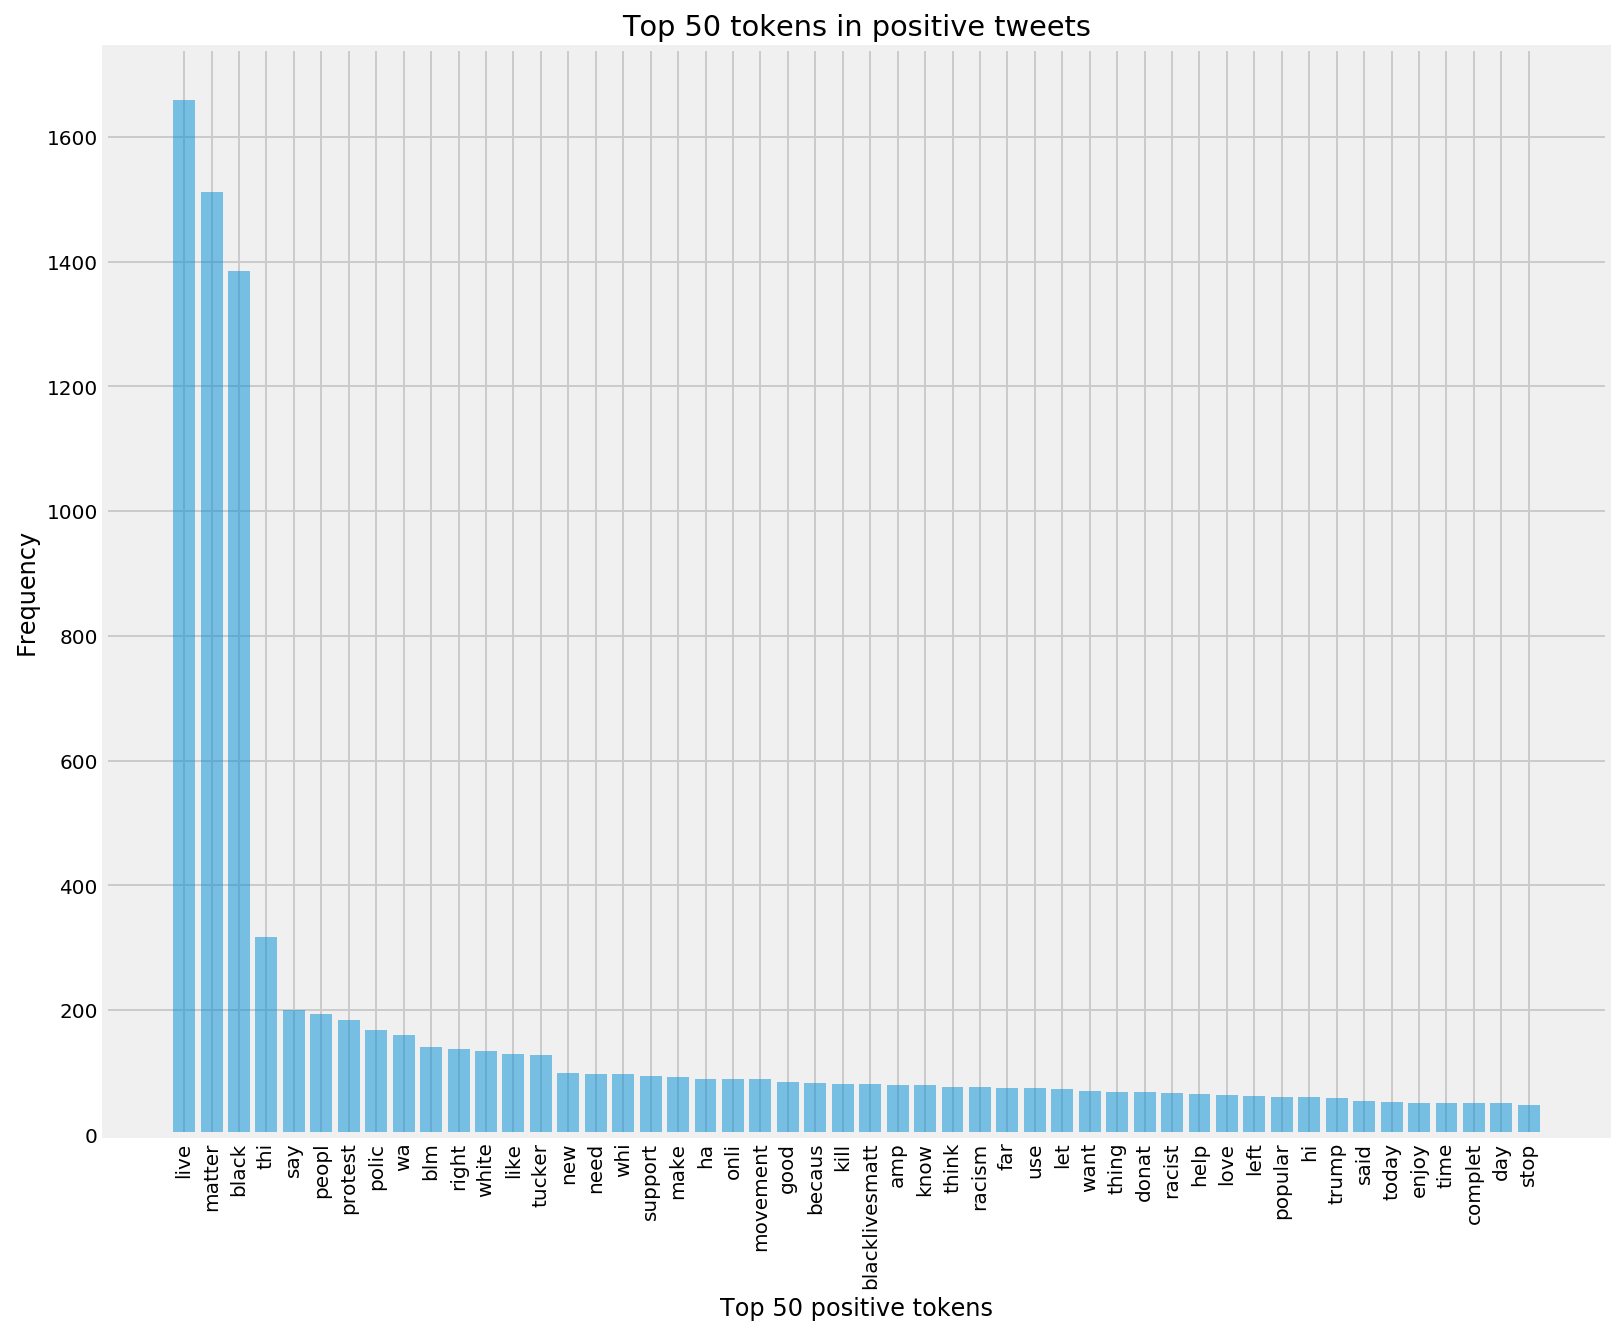

In [92]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')
plt.show()

# Split data into test and train

In [261]:
from gensim import models
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [262]:
df, data_test = train_test_split(df, test_size=0.10, random_state=42)

In [263]:
all_training_words = [word for tokens in df["Tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in df["Tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

62400 words total, with a vocabulary size of 7188
Max sentence length is 20


In [264]:
all_test_words = [word for tokens in data_test["Tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["Tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

6905 words total, with a vocabulary size of 2144
Max sentence length is 17


# Load Google News Word2Vec model

In [97]:
word2vec_path = r'C:\Users\amitk\Machine Learning\Word2Vec\GoogleNews-vectors-negative300.bin'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [98]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['Tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

# Get Embeddings

In [265]:
training_embeddings = get_word2vec_embeddings(word2vec, df, generate_missing=True)

In [266]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

# Tokenize and Pad sequences

In [267]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(df["Text"].tolist())
training_sequences = tokenizer.texts_to_sequences(df["Text"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 7188 unique tokens.


In [268]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [269]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(7189, 300)


In [270]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Define CNN

In [271]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Model

In [272]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [273]:
num_epochs = 12
batch_size = 34

In [274]:
label_names = ['Pos', 'Neg']

In [275]:
y_train = df[label_names].values
x_train = train_cnn_data
y_tr = y_train
print(x_train.shape)
print(y_tr.shape)

(6354, 50)
(6354, 2)


In [276]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 50, 300)      2156700     input_10[0][0]                   
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 49, 200)      120200      embedding_10[0][0]               
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 48, 200)      180200      embedding_10[0][0]               
____________________________________________________________________________________________

In [277]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Train on 5718 samples, validate on 636 samples
Epoch 1/12
5718/5718 [==============================] - 17s 3ms/step - loss: 0.5568 - acc: 0.7308 - val_loss: 0.4690 - val_acc: 0.7720
Epoch 2/12
5718/5718 [==============================] - 17s 3ms/step - loss: 0.3814 - acc: 0.8374 - val_loss: 0.3729 - val_acc: 0.8388
Epoch 3/12
5718/5718 [==============================] - 16s 3ms/step - loss: 0.2554 - acc: 0.8982 - val_loss: 0.3194 - val_acc: 0.8868
Epoch 4/12
5718/5718 [==============================] - 18s 3ms/step - loss: 0.1390 - acc: 0.9509 - val_loss: 0.3061 - val_acc: 0.8813
Epoch 5/12
5718/5718 [==============================] - 18s 3ms/step - loss: 0.0717 - acc: 0.9776 - val_loss: 0.3613 - val_acc: 0.8892
Epoch 6/12
5718/5718 [==============================] - 17s 3ms/step - loss: 0.0443 - acc: 0.9861 - val_loss: 0.3792 - val_acc: 0.8884
Epoch 7/12
5718/5718 [==============================] - 18s 3ms/step - loss: 0.0322 - acc: 0.9906 - val_loss: 0.4239 - val_acc: 0.8899
Epoch 8/

# Test CNN Model

In [278]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

707/707 [==============================] - 1s 875us/step


In [279]:
labels = [1, 0]

In [280]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [281]:
sum(data_test.Polarity==prediction_labels)/len(prediction_labels)

0.9151343705799151

In [282]:
data_test.Polarity.value_counts()

0    447
1    260
Name: Polarity, dtype: int64

# Confusion Matrix

In [283]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

In [284]:
result = confusion_matrix(data_test['Polarity'], prediction_labels)
print("Confusion MAtrix :- ")
print(result)

Confusion MAtrix :- 
[[429  18]
 [ 42 218]]


Confusion matrix, without normalization
[[429  18]
 [ 42 218]]


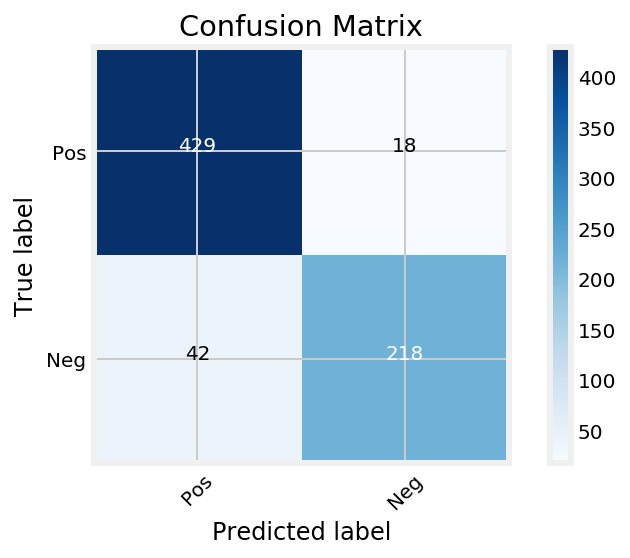

In [285]:
plot_confusion_matrix(result,classes =["Pos","Neg"],title = "Confusion Matrix")

In [286]:
# Some parameters using confusion matrix
TP = result[0][0]
FN = result[0][1]
FP = result[1][0]
TN = result[1][1]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall = TP / (TP + FN)
Precision = TP / (TP + FP)
Fmeasure = (2 * Recall * Precision) / (Recall + Precision)

print("Accuracy  : ", Accuracy)
print("Recall    : ", Recall)
print("Precision : ", Precision)
print("F-measure : ", Fmeasure)

Accuracy  :  0.9151343705799151
Recall    :  0.959731543624161
Precision :  0.910828025477707
F-measure :  0.934640522875817


In [292]:
def loss(y_oht,pred):
    l = -np.mean(y_oht*np.log(pred))
    return l

def one_hot(y,depth):
    m = y_tr.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y_tr] = 1
    return y_oht

In [293]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

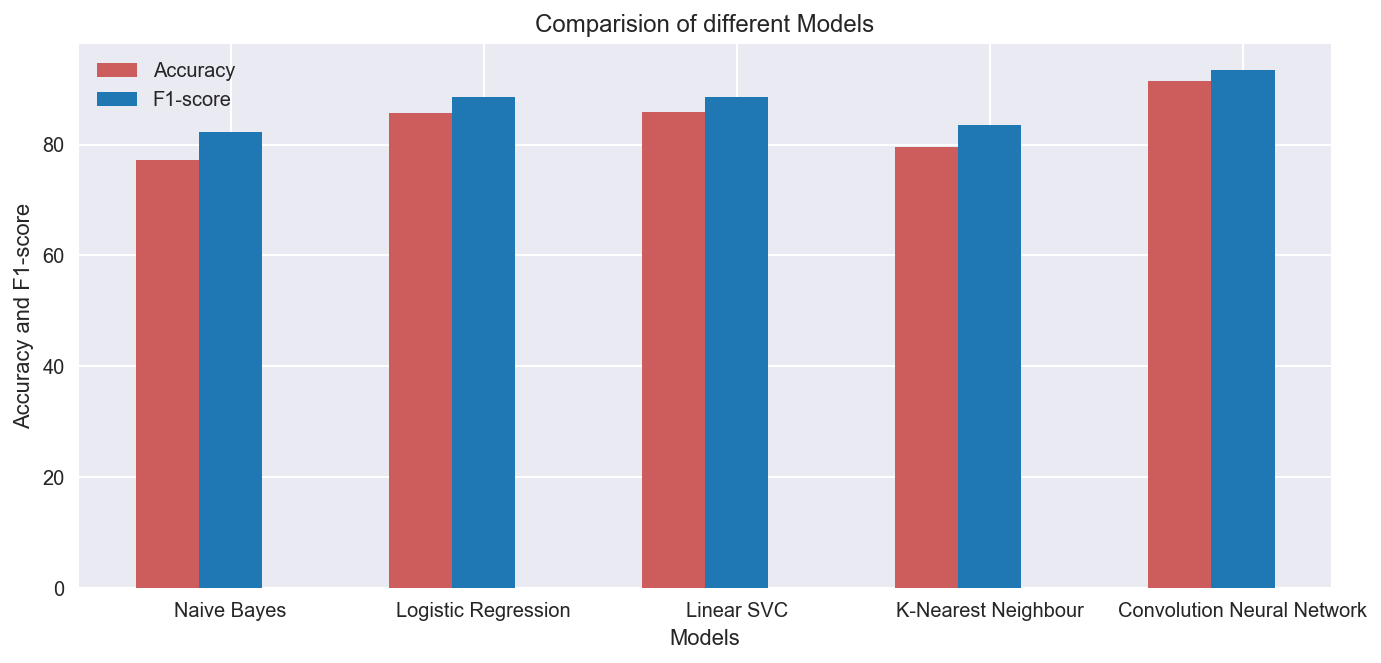

In [315]:
# Importing the matplotlib library
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10,5])
# Data to be plotted
Accuracy = [77.13,85.73,85.84,79.49,91.51]
F1score = [82.36,88.65,88.53,83.61,93.49]
# Using numpy to group 3 different data with bars
X = np.arange(len(Accuracy))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, Accuracy, color = 'indianred', width = 0.25,tick_label=True)
plt.bar(X + 0.25, F1score, color = 'tab:blue', width = 0.25,tick_label=True)
# Creating the legend of the bars in the plot
plt.legend(['Accuracy', 'F1-score'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(5)], ["Naive Bayes","Logistic Regression","Linear SVC","K-Nearest Neighbour","Convolution Neural Network"])
# Giving the tilte for the plot
plt.title("Comparision of different Models")
# Namimg the x and y axis
plt.xlabel('Models')
plt.ylabel('Accuracy and F1-score')
# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()